# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | gadani
Processing Record 8 of Set 1 | al artawiyah
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | umluj
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | wagga wagga
Processing Record 17 of Set 1 | corner brook
Processing Record 18 of Set 1 | porto-vecchio
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | wailua homesteads
P

Processing Record 38 of Set 4 | san patricio
Processing Record 39 of Set 4 | catabola
Processing Record 40 of Set 4 | herval
Processing Record 41 of Set 4 | vershino-darasunskiy
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | tolanaro
Processing Record 44 of Set 4 | tobi village
City not found. Skipping...
Processing Record 45 of Set 4 | happy valley-goose bay
Processing Record 46 of Set 4 | nuuk
Processing Record 47 of Set 4 | sao romao
Processing Record 48 of Set 4 | namie
Processing Record 49 of Set 4 | chikitigarh
Processing Record 0 of Set 5 | margate
Processing Record 1 of Set 5 | cabedelo
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | el chorrillo
Processing Record 4 of Set 5 | tutoia
Processing Record 5 of Set 5 | bastia
Processing Record 6 of Set 5 | nova sintra
Processing Record 7 of Set 5 | susuman
Processing Record 8 of Set 5 | olonkinbyen
Processing Record 9 of Set 5 | enoch
Processing Record 10 of Set 5 | nadym
Processing Recor

Processing Record 32 of Set 8 | sabzevar
Processing Record 33 of Set 8 | sinop
Processing Record 34 of Set 8 | igarka
Processing Record 35 of Set 8 | ierapetra
Processing Record 36 of Set 8 | zigong
Processing Record 37 of Set 8 | sisimiut
Processing Record 38 of Set 8 | chutove
Processing Record 39 of Set 8 | fortaleza
Processing Record 40 of Set 8 | santa luzia
Processing Record 41 of Set 8 | marsh harbour
Processing Record 42 of Set 8 | amos
Processing Record 43 of Set 8 | ciudad bolivar
Processing Record 44 of Set 8 | ulldecona
Processing Record 45 of Set 8 | tereze
Processing Record 46 of Set 8 | fisterra
Processing Record 47 of Set 8 | queenstown
Processing Record 48 of Set 8 | college
Processing Record 49 of Set 8 | rayside-balfour
City not found. Skipping...
Processing Record 0 of Set 9 | ar raqqah
Processing Record 1 of Set 9 | genhe
Processing Record 2 of Set 9 | kiunga
Processing Record 3 of Set 9 | fortuna
Processing Record 4 of Set 9 | uvinza
Processing Record 5 of Set 9 |

Processing Record 21 of Set 12 | cable beach
City not found. Skipping...
Processing Record 22 of Set 12 | skiathos
Processing Record 23 of Set 12 | pont rouge
Processing Record 24 of Set 12 | bullas
Processing Record 25 of Set 12 | chake chake
Processing Record 26 of Set 12 | santa cruz del sur
Processing Record 27 of Set 12 | tchintabaraden
Processing Record 28 of Set 12 | suva
Processing Record 29 of Set 12 | greater sudbury
Processing Record 30 of Set 12 | kununurra
Processing Record 31 of Set 12 | chokwe
Processing Record 32 of Set 12 | fedorovskiy
Processing Record 33 of Set 12 | arauco
Processing Record 34 of Set 12 | otjimbingwe
Processing Record 35 of Set 12 | west end
Processing Record 36 of Set 12 | copiapo
Processing Record 37 of Set 12 | teknaf
Processing Record 38 of Set 12 | guerrero negro
Processing Record 39 of Set 12 | bodaybo
Processing Record 40 of Set 12 | puerto aysen
Processing Record 41 of Set 12 | mwene-ditu
Processing Record 42 of Set 12 | nueva gerona
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.7333,139.5000,15.87,72,75,0.00,AU,1689863957
1,portland,45.5234,-122.6762,18.36,81,20,1.54,US,1689863361
2,whitehorse,60.7161,-135.0538,12.12,68,75,1.03,CA,1689863957
3,bilibino,68.0546,166.4372,12.53,80,98,0.78,RU,1689863957
4,longyearbyen,78.2186,15.6401,12.91,50,20,6.69,SJ,1689863958


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,15.87,72,75,0.00,AU,1689863957
1,portland,45.5234,-122.6762,18.36,81,20,1.54,US,1689863361
2,whitehorse,60.7161,-135.0538,12.12,68,75,1.03,CA,1689863957
3,bilibino,68.0546,166.4372,12.53,80,98,0.78,RU,1689863957
4,longyearbyen,78.2186,15.6401,12.91,50,20,6.69,SJ,1689863958


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

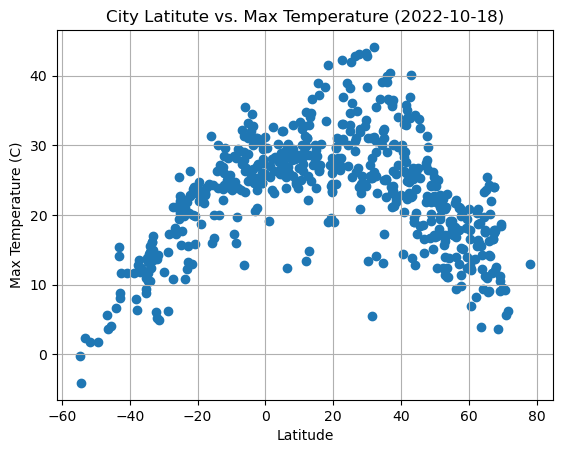

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])


# Incorporate the other graph properties
plt.title("City Latitute vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

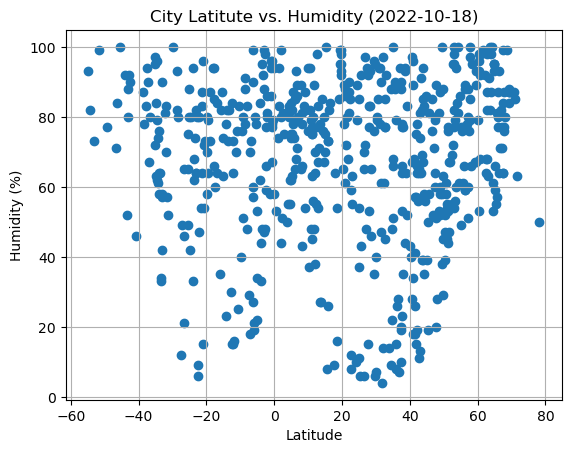

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

plt.title("City Latitute vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitute vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

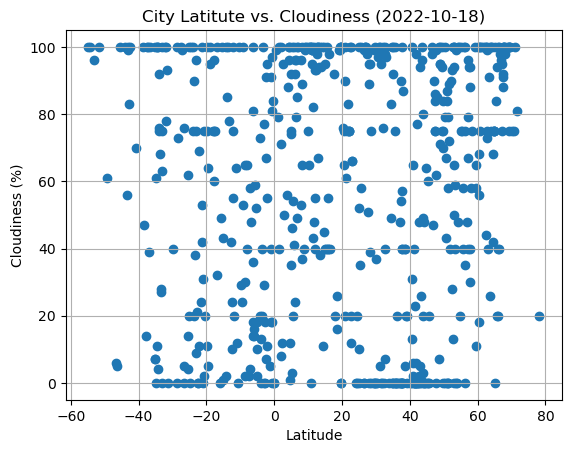

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitute vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

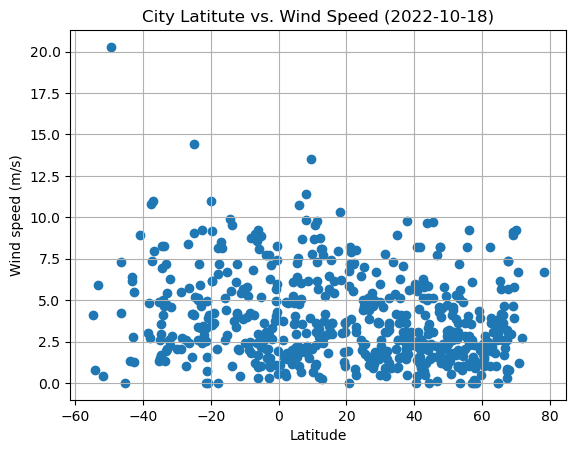

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitute vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,portland,45.5234,-122.6762,18.36,81,20,1.54,US,1689863361
2,whitehorse,60.7161,-135.0538,12.12,68,75,1.03,CA,1689863957
3,bilibino,68.0546,166.4372,12.53,80,98,0.78,RU,1689863957
4,longyearbyen,78.2186,15.6401,12.91,50,20,6.69,SJ,1689863958
6,gadani,25.1185,66.7299,32.12,85,100,4.62,PK,1689863958


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,15.87,72,75,0.00,AU,1689863957
5,adamstown,-25.0660,-130.1015,22.72,80,100,14.42,PN,1689863958
8,puerto natales,-51.7236,-72.4875,1.73,99,100,0.41,CL,1689863958
10,ushuaia,-54.8000,-68.3000,-0.19,93,100,4.12,AR,1689863959
12,port-aux-francais,-49.3500,70.2167,1.73,77,61,20.28,TF,1689863959


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.5976047


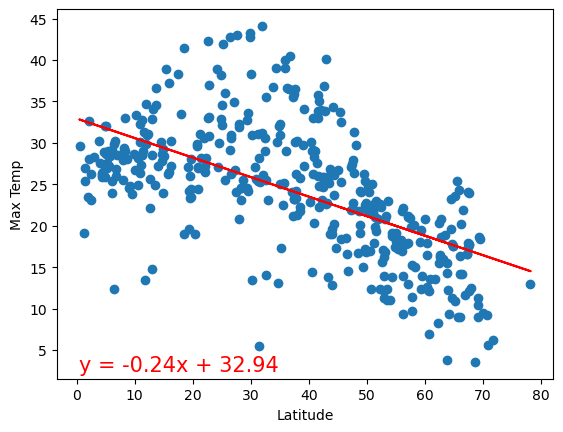

In [50]:
# Linear regression on Northern Hemisphere
xn = northern_hemi_df ["Lat"]
yn = northern_hemi_df ["Max Temp"]

correlation = st.pearsonr(xn, yn)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn, yn)
regress_values = xn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn,yn)
plt.plot(xn,regress_values,"r-")
plt.annotate(line_eq,(0.5,2.5),fontsize=15,color="red")

plt.ylabel("Max Temp")
plt.xlabel("Latitude")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()

**Discussion about the linear relationship:** There is a negative correlation between those factors.

The r-value is:0.86679178


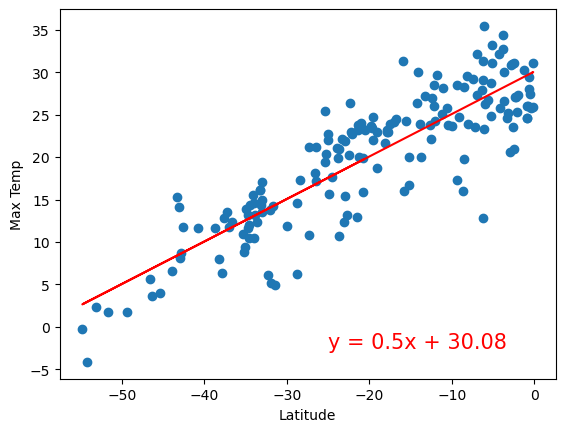

In [52]:
# Linear regression on Southern Hemisphere
xs = southern_hemi_df ["Lat"]
ys = southern_hemi_df ["Max Temp"]

correlation = st.pearsonr(xs, ys)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress_values = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs,ys)
plt.plot(xs,regress_values,"r-")
plt.annotate(line_eq,(-25,-2.5),fontsize=15,color="red")

plt.ylabel("Max Temp")
plt.xlabel("Latitude")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()

**Discussion about the linear relationship:** There is a strong positive correlation between those factors.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.08410114


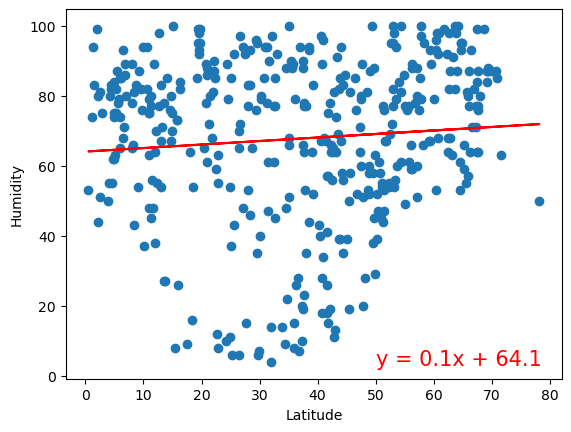

In [48]:
# Northern Hemisphere
xn2 = northern_hemi_df ["Lat"]
yn2 = northern_hemi_df ["Humidity"]

correlation = st.pearsonr(xn2, yn2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn2, yn2)
regress_values = xn2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn2,yn2)
plt.plot(xn,regress_values,"r-")
plt.annotate(line_eq,(50,3),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()

**Discussion about the linear relationship:** There is a no correlation between those factors.

The r-value is:-0.14576472


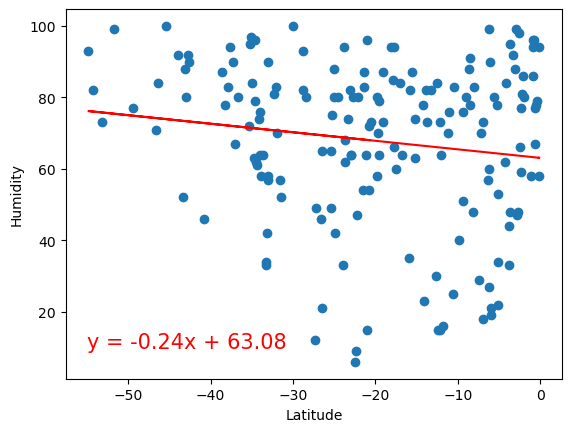

In [53]:
# Southern Hemisphere
xs2 = southern_hemi_df ["Lat"]
ys2 = southern_hemi_df ["Humidity"]

correlation = st.pearsonr(xs2, ys2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs2, ys2)
regress_values = xs2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs2,ys2)
plt.plot(xs2,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()

**Discussion about the linear relationship:** There is a very weak negative correlation between those factors.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.00041813


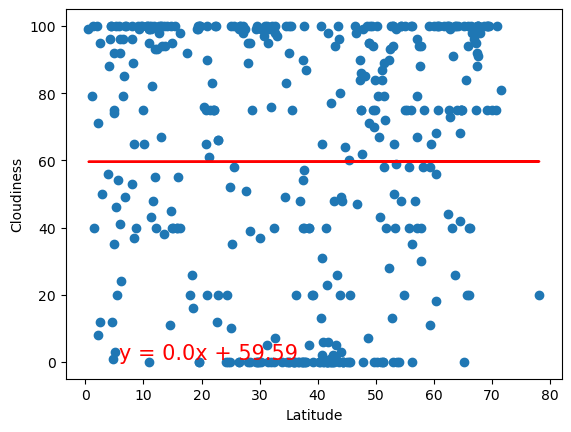

In [25]:
# Northern Hemisphere
xn3 = northern_hemi_df ["Lat"]
yn3 = northern_hemi_df ["Cloudiness"]

correlation = st.pearsonr(xn3, yn3)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn3, yn3)
regress_values = xn3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn3,yn3)
plt.plot(xn,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()

**Discussion about the linear relationship:** There is no correlation between those factors.

The r-value is:-0.28538696


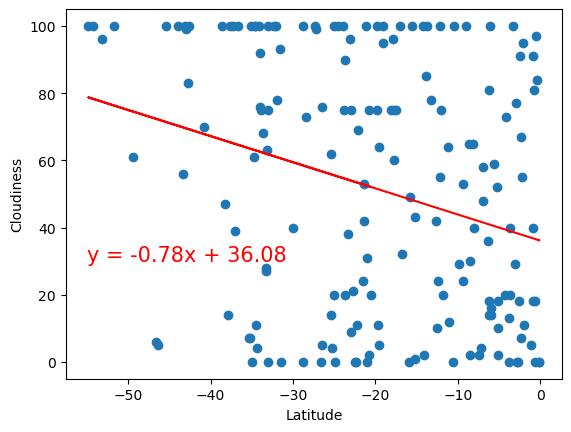

In [54]:
# Southern Hemisphere
xs3 = southern_hemi_df ["Lat"]
ys3 = southern_hemi_df ["Cloudiness"]

correlation = st.pearsonr(xs3, ys3)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs3, ys3)
regress_values = xs3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs3,ys3)
plt.plot(xs2,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()

**Discussion about the linear relationship:** There is a very weak negative correlation between those factors.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.16228749


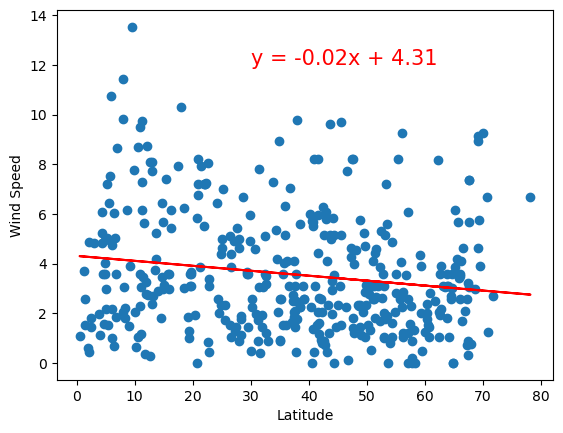

In [55]:
# Northern Hemisphere
xn4 = northern_hemi_df ["Lat"]
yn4 = northern_hemi_df ["Wind Speed"]

correlation = st.pearsonr(xn4, yn4)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn4, yn4)
regress_values = xn4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn4,yn4)
plt.plot(xn,regress_values,"r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()

**Discussion about the linear relationship:** There is almost no correlation between those factors.

The r-value is:-0.09211778


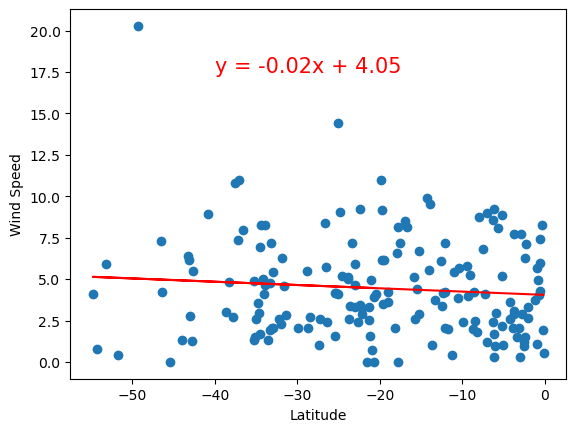

In [56]:
# Southern Hemisphere
xs4 = southern_hemi_df ["Lat"]
ys4 = southern_hemi_df ["Wind Speed"]

correlation = st.pearsonr(xs4, ys4)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs4, ys4)
regress_values = xs4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs4,ys4)
plt.plot(xs2,regress_values,"r-")
plt.annotate(line_eq,(-40,17.5),fontsize=15,color="red")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()

**Discussion about the linear relationship:** There is no correlation between those factors.